<a href="https://colab.research.google.com/github/componavt/wd_book/blob/master/programming_tasks/natural_disasters/volcano_earthquake_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌋 Volcano-Earthquake Clustering Analysis

This notebook analyzes the grouping of volcanoes and earthquakes based on proximity 🌍, using a KD-tree for efficient neighbor search.  
Instead of matching only pairs, we form **groups** (clusters) where the distance between any two points is below `dist_max`.  

We plot:
- Number of groups
- Average group size
- Variance of group sizes

For the program to work, you need two CSV files generated using SPARQL queries: https://w.wiki/AXz7 and https://w.wiki/AY2R

> "The Earth is the cradle of humanity, but mankind cannot stay in the cradle forever."  
> — Konstantin Tsiolkovsky 🚀

In [1]:
import folium
import csv
import numpy as np
from geopy.distance import geodesic
from scipy.spatial import KDTree
# import pprint # Pretty Print for objects

# Input parameters
dist_max = 100  # maximum distance (km) between volcano and earthquake to draw a line

f_volcano = "volcanoes_2023.csv"
f_earthquake = "earthquakes_2023.csv"

# Download CSV files from GitHub
!wget https://raw.githubusercontent.com/componavt/wd_book/master/programming_tasks/natural_disasters/data/$f_volcano
!wget https://raw.githubusercontent.com/componavt/wd_book/master/programming_tasks/natural_disasters/data/$f_earthquake

!head -n 3 $f_volcano
!head -n 3 $f_earthquake

--2025-04-26 16:44:37--  https://raw.githubusercontent.com/componavt/wd_book/master/programming_tasks/natural_disasters/data/volcanoes_2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76165 (74K) [text/plain]
Saving to: ‘volcanoes_2023.csv’

volcanoes_2023.csv  100%[===================>]  74.38K  --.-KB/s    in 0.02s   

2025-04-26 16:44:37 (3.16 MB/s) - ‘volcanoes_2023.csv’ saved [76165/76165]

--2025-04-26 16:44:37--  https://raw.githubusercontent.com/componavt/wd_book/master/programming_tasks/natural_disasters/data/earthquakes_2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

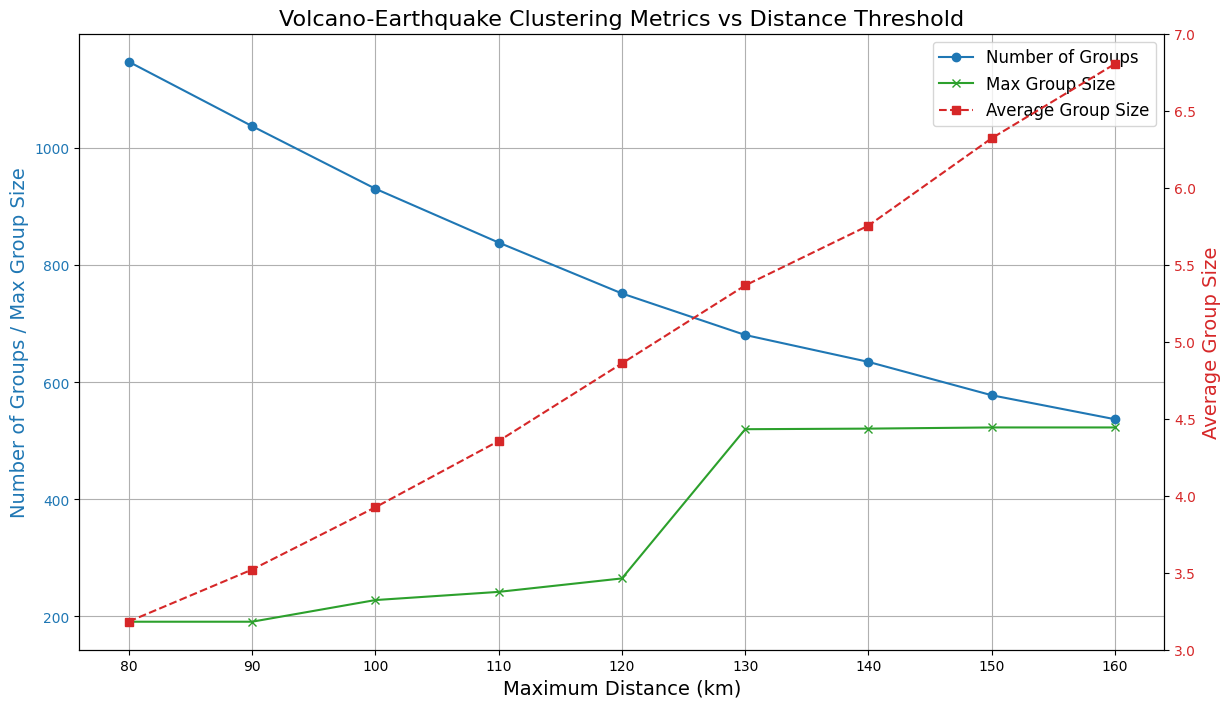

In [8]:
#distances_max_list = range(10, 250, 10)  # Test thresholds from 10 km to 250 km
distances_max_list = range(80, 170, 10)

import matplotlib.pyplot as plt

# Подготовим дополнительные данные: максимальный размер группы
max_group_size_list = []

for dist_max in distances_max_list:
    G = nx.Graph()

    # Добавляем узлы
    for idx, coord in enumerate(all_coords):
        G.add_node(idx, pos=coord, type=types[idx])

    # Находим соседей в пределах dist_max
    for idx, coord in enumerate(all_coords):
        indices = tree.query_ball_point(np.radians(coord), r=dist_max/6371.0)
        for neighbor_idx in indices:
            if neighbor_idx != idx:
                G.add_edge(idx, neighbor_idx)

    connected_components = list(nx.connected_components(G))
    if connected_components:
        max_group_size = max(len(group) for group in connected_components)
    else:
        max_group_size = 0
    max_group_size_list.append(max_group_size)

# --- Рисуем расширенный график ---

fig, ax1 = plt.subplots(figsize=(14,8))

color1 = 'tab:blue'
ax1.set_xlabel('Maximum Distance (km)', fontsize=14)
ax1.set_ylabel('Number of Groups / Max Group Size', color=color1, fontsize=14)
lns1 = ax1.plot(distances_max_list, groups_count_list, marker='o', label="Number of Groups", color=color1)
lns2 = ax1.plot(distances_max_list, max_group_size_list, marker='x', label="Max Group Size", color='tab:green')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True)

# Вторая ось
ax2 = ax1.twinx()

color2 = 'tab:red'
ax2.set_ylabel('Average Group Size', color=color2, fontsize=14)
lns3 = ax2.plot(distances_max_list, average_group_size_list, marker='s', linestyle='--', label="Average Group Size", color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(3, 7)  # Установить ограничение оси справа

# Легенда
lns = lns1 + lns2 + lns3
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper right', fontsize=12)

plt.title('Volcano-Earthquake Clustering Metrics vs Distance Threshold', fontsize=16)
plt.show()